In [1]:
import numpy as np  # for working with arrays
import platform     # for getting the operating system

# if Linux OS assume user is on the supercomputer AND PREVENT NEED FOR X11
if platform.system() == 'Linux':  
    import matplotlib
    matplotlib.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
    import matplotlib.pyplot as plt # plotting functions
else:
    import pylab as plt # import plotting functions normally

# for saving object instances
try:
   import cPickle as pickle # if available use cPickle (~1000x faster than pickle)
except:
   import pickle

In [2]:
def activation_profile(all_results,save_filename,max_amp=10,step=1):
    """
    Collect threshold results from the entire simulation population (simulation_pop),
    generate an activation plot (% activated at each simulation amplitude), and save
    the plot as activation_profile.png
    
    >>> activation_profile(simulation_pop)
    >>> activation_profile(simulation_pop,max_amp)
    >>> activation_profile(simulation_pop,max_amp,step)
    
    Inputs:
    simulation_pop: (list) list of cell or axon objs
    max_amp:        (int or double, defualt=1) max stimulation amplitude for the activation plot
    step:           (int or double, defualt=0.0125) resolution of the activation plot
    """   
    
    N=len(all_results)
    thresholds = [all_results[iCell]['thresh'] for iCell in range(N)]
    num_cells=np.zeros(int(max_amp/step)+1)
    amplitude = np.arange(0,max_amp+step,step)
    for ii in range(N):
        for jj in range(0,len(amplitude)-1):
            if thresholds[ii] >= amplitude[jj] and thresholds[ii] < amplitude[jj+1]:
                num_cells[jj] += 1
    
    running_sum = np.cumsum(num_cells,axis=0);
    percent_act=(running_sum/N)*100;
    
    plt.figure()        
    plt.plot(amplitude,percent_act)
    plt.ylim((0, 101))
    plt.xlabel('Stimulation amplitude (V)')
    plt.ylabel('Activation (%)')
    plt.title('Activation')
    plt.grid(True)
    plt.savefig(save_filename + "activation_profile.png")

    return amplitude, percent_act

In [3]:
def membrane_v(all_results,save_filename):
    """
    Plot the membrane voltage recorded by membrane_v for each cell or axon obj.
    
    >>> membrane_v(simulation_pop)
    
    Inputs:
    simulation_pop: (list) list of cell or axon objs
    """   
    
    N=len(all_results)
    membrane_v = [all_results[iCell]['membrane_v'] for iCell in range(N)]
    membrane_v_time = [all_results[iCell]['membrane_v_time'] for iCell in range(N)]
    
    plt.figure()        
    # Plot membrane potential from axon
    for iCell in range(N):
        plt.plot(np.array(membrane_v_time[iCell]),np.array(membrane_v[iCell])+(iCell*100))
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.title('Recorded membrane voltage at last node at activation threshold')
    plt.grid(True)
    plt.savefig(save_filename + "membrane_V.png")

In [4]:
def results2dat(all_results,stim_pulse_filename,output_filename):
    """
    Save the simulation results in a .dat file
    
    >>> results2dat(simulation_pop,stim_pulse_filename)
    >>> results2dat(simulation_pop,stim_pulse_filename,output_filename)
    
    Inputs:
    simulation_pop:     (list) list of cell or axon objs
    stim_pulse_filename:(str) name of stimualtion pulse filename (just for record keeping)
    output_filename:    (str, defualt="simulation_results") name of output file
    """   
    # Output file
    output_filename = output_filename + ".dat"
    output_file = open(output_filename, 'w')
    output_file.write("DBS pulse train stimulation of an axon population \n \n")
    output_file.write("Stimulus waveform used:" + stim_pulse_filename + "\n")
    output_file.write("Cell\tThreshold\tNum Extra\tAvg Freq\tAvg Inst Freq\tWaveform\tStdev Inst Freq\tAP_site1\tAP_site2\ttime1\ttime2\tAvg spikes/sec B (Hz)\tAvg Inst firing B (Hz)\tInst rate STD B (Hz)\tFiring period B (ms)\n")

    N=18 #len(all_results)
    for iCell in range(0,N,1):
        output_file.write(str(iCell+1) + "\t")
        output_file.write(str(all_results[iCell]['thresh']) + "\t")
        output_file.write(str(all_results[iCell]['nExtraAPs']) + "\t")
        output_file.write(str(all_results[iCell]['avg_freq']) + "\t")
        output_file.write(str(all_results[iCell]['avg_inst_freq']) + "\t")
        output_file.write(all_results[iCell]['waveform']+"\t")
        output_file.write(str(all_results[iCell]['std_inst_freq']) + "\t" + str(all_results[iCell]['AP_site1']) + "\t"  + str(all_results[iCell]['AP_site2']) + "\t"  + str(all_results[iCell]['time1']) + "\t"  + str(all_results[iCell]['time2']) + "\n")
    output_file.close()

In [4]:
import os
from glob import glob
from scipy.io import loadmat
from scipy.io import savemat

In [5]:
ls

analyze_population_jl.ipynb


In [11]:
os.getcwd().replace('Analysis', '')

'/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/R_STNGPeDBS_STN_p1a-n3a_0p5_solved/'

In [12]:
#dir_neuronsim = '/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/Barb_R_GPeSTN'
dir_neuronsim = os.getcwd().replace('Analysis', '')

dir_simulations = os.path.join(dir_neuronsim, 'Simulations')
dir_results = os.path.join(dir_neuronsim, 'Results', )
dir_analysis = os.path.join(dir_neuronsim, 'Analysis')

In [13]:
list_results_stimSeg = glob(os.path.join(dir_simulations, 'results_n16', 'results_*'))
list_results_stimSeg

['/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/R_STNGPeDBS_STN_p1a-n3a_0p5_solved/Simulations/results_n16/results_Neuron_Data_PSO0',
 '/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/R_STNGPeDBS_STN_p1a-n3a_0p5_solved/Simulations/results_n16/results_Neuron_Data_PSO1',
 '/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/R_STNGPeDBS_STN_p1a-n3a_0p5_solved/Simulations/results_n16/results_Neuron_Data_PSO10',
 '/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/R_STNGPeDBS_STN_p1a-n3a_0p5_solved/Simulations/results_n16/results_Neuron_Data_PSO11',
 '/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/R_STNGPeDBS_STN_p1a-n3a_0p5_solved/Simulations/results_n16/results_Neuron_Data_PSO12',
 '/home/jaejin/mnt/gdrive_jaejin/Work/PAM/Barb/Modeling_Data_rev1/Data_Processing/NeuronSim/R_STNGPeDBS_STN

In [14]:
os.path.split(list_results_stimSeg[0])[1]

'results_Neuron_Data_PSO0'

In [16]:
N_stimSeg = len(list_results_stimSeg)
N_stimSeg

92

In [17]:
all_results = {}
for seg in range(N_stimSeg):
    #dir_seg = os.path.split(list_results_stimSeg[seg])[1]
    dir_seg = list_results_stimSeg[seg]
    list_results = os.listdir(dir_seg)
    N = len(list_results)
    
    seg_results = {}
    for cell in range(N):
        seg_results[cell] = loadmat(f'{dir_seg}/axon{cell+1}.mat')

    all_results[seg] = seg_results

In [18]:
dir_seg = list_results_stimSeg[seg]
list_results = os.listdir(dir_seg)
N = len(list_results)
cell = 0
loadmat(f'{dir_seg}/axon{cell+1}.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Apr  9 00:43:06 2024',
 '__version__': '1.0',
 '__globals__': [],
 'thresh': array([[0.47250426]]),
 'nExtraAPs': array([[0]]),
 'time1': array([[22.13]]),
 'time2': array([[22.13]]),
 'AP_site1': array([[37]]),
 'AP_site2': array([[38]]),
 'avg_freq': array([[130.]]),
 'avg_inst_freq': array([[0]]),
 'std_inst_freq': array([[0]]),
 'membrane_v': array([[-70.        , -69.91616892, -69.84165724, ..., -72.45037763,
         -72.45070352, -72.45102887]]),
 'membrane_v_time': array([[0.000e+00, 1.000e-02, 2.000e-02, ..., 4.768e+01, 4.769e+01,
         4.770e+01]]),
 'stim': array([[0., 0., 0., ..., 0., 0., 0.]]),
 'stimulus_train': array([[0., 0., 0., ..., 0., 0., 0.]]),
 'scaled_stim_pulse_partial': array([[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0

In [19]:
all_results

{0: {0: {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Apr  9 00:31:04 2024',
   '__version__': '1.0',
   '__globals__': [],
   'thresh': array([[0.47250426]]),
   'nExtraAPs': array([[0]]),
   'time1': array([[22.13]]),
   'time2': array([[22.13]]),
   'AP_site1': array([[37]]),
   'AP_site2': array([[38]]),
   'avg_freq': array([[130.]]),
   'avg_inst_freq': array([[0]]),
   'std_inst_freq': array([[0]]),
   'membrane_v': array([[-70.        , -69.91616892, -69.84165724, ..., -72.45037763,
           -72.45070352, -72.45102887]]),
   'membrane_v_time': array([[0.000e+00, 1.000e-02, 2.000e-02, ..., 4.768e+01, 4.769e+01,
           4.770e+01]]),
   'stim': array([[0., 0., 0., ..., 0., 0., 0.]]),
   'stimulus_train': array([[0., 0., 0., ..., 0., 0., 0.]]),
   'scaled_stim_pulse_partial': array([[-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          ...,
          [-0., -0., -0., 

In [25]:
len(all_results)

92

In [21]:
len(all_results[0])

16

In [22]:
all_results[0][0]['thresh']

array([[0.47250426]])

In [23]:
dir_analysis_activation = os.path.join(dir_analysis, 'Activation')
if not os.path.isdir(dir_analysis_activation):
    os.mkdir(dir_analysis_activation)

os.chdir(dir_analysis_activation)

In [24]:
amp0, act0 = activation_profile(all_results[0], f'stimSeg{0}_')
print(amp0)
print(act0)

[ 0  1  2  3  4  5  6  7  8  9 10]
[56.25 75.   75.   75.   75.   81.25 81.25 81.25 81.25 81.25 81.25]


In [26]:
amp1, act1 = activation_profile(all_results[0], f'stimSeg{0}_')
print(amp0)
print(act0)

[ 0  1  2  3  4  5  6  7  8  9 10]
[56.25 75.   75.   75.   75.   81.25 81.25 81.25 81.25 81.25 81.25]


In [27]:
activation = np.zeros((11,92))

for seg in range(N_stimSeg):
    _, activation[:,seg] = activation_profile(all_results[seg], f'stimSeg{seg}_')

/tmp/ipykernel_722220/1610147036.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


In [28]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [29]:
activation

array([[56.25, 56.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  , 56.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  , 56.25,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 56.25,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        56.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  , 56.25,  0.  ,  0.  ,  0.  ,  0.  , 56.25, 56.25,
        56.25, 56.25, 56.25, 56.25, 56.25, 56.25, 56.25, 56.25, 56.25,
        56.25, 56.25, 56.25, 56.25, 56.25, 56.25,  0.  , 56.25, 56.25,
        56.25, 56.25, 56.25, 56.25, 56.25, 56.25, 56.25, 56.25,  0.  ,
        56.25, 56.25],
       [75.  , 75.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  , 75.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  , 75.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0. 

In [34]:
type(activation)

numpy.ndarray

In [35]:
activation.shape

(11, 92)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

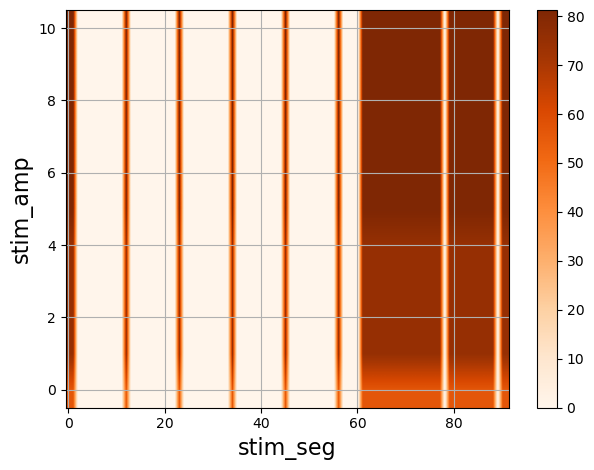

In [165]:
fig, ax = plt.subplots()
plt.imshow(activation, cmap='Oranges', interpolation='bilinear', aspect='auto')
plt.grid(True)
ax.invert_yaxis()
ax.set_xlabel('stim_seg', fontsize=16)
ax.set_ylabel('stim_amp', fontsize=16)
plt.colorbar(location='right', anchor=(0, 0.3), shrink=1.0)
plt.tight_layout()

In [166]:
simName = os.getcwd().split('/')[-3]
simName

'R_STNGPeDBS_STN_p1a-n3a_0p5_solved'

In [167]:
fig.savefig(simName + "_activation_map.png")